In [46]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [30]:
np.random.seed(1)
# Sampling from the standard normal distribution
# Standard normal: mean=0, std=1
X_xor = np.random.randn(200,2)


In [31]:

y_xor = np.logical_xor(X_xor[:,0]>0, X_xor[:,1]>0)
## X_xor[:,0] is the first column of X_xor. X_xor[:,0]>0 returns a boolean column vector.
## np.logical_xor compares elementwise the two boolean vectors. 

print(np.logical_xor(False, False))
print(np.logical_xor(False, True))
print(np.logical_xor(True, False))
print(np.logical_xor(True, True))

False
True
True
False


In [32]:
# Assign labels
y_xor = np.where(y_xor, 1, 0)

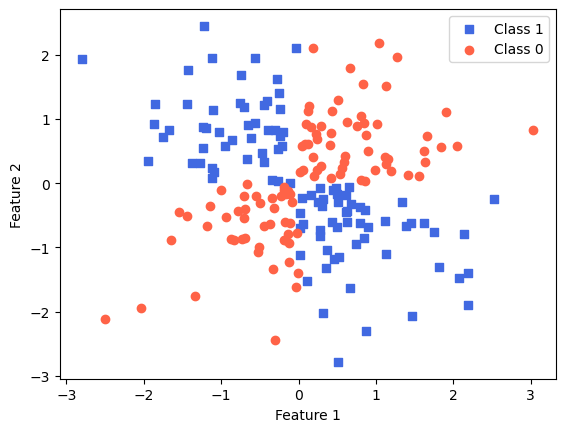

In [33]:
# Visualize the data
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], label='Class 1', marker='s', color='royalblue')
ax.scatter(X_xor[y_xor==0, 0], X_xor[y_xor==0, 1], label='Class 0', marker='o', color='tomato')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.legend()


In [34]:
# In the following, we show that the logistic regression and SVM do not work well.
lr = LogisticRegression(C=100, solver='lbfgs')
lr.fit(X_xor, y_xor)


LogisticRegression(C=100)

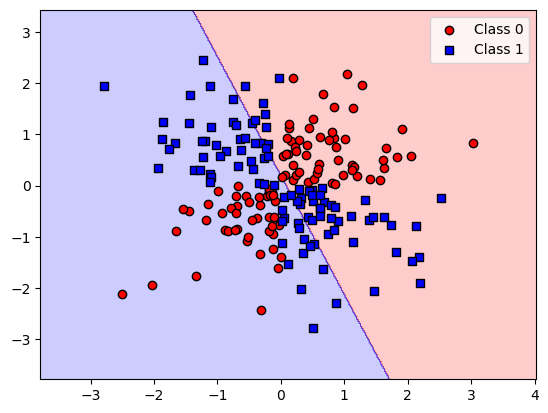

In [35]:
# Visualization
# Provide the testing data together with the original data.
def plot_decision_regions2(X, y, classifier, resolution=0.02, X_test=None):
    # Create lists of markers and colors
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    
    # np.unique: find the unique elements of an array
    # The output y only has two possible values, 0 and 1. Therefore np.unique(y) is 2.
    # Then colors[:len(np.unique(y))] is colors[:2], i.e., colors = ('red', 'blue')
    # This is suitable for discrete colors.
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Set the range 
    # The range of the figure is larger than the range of the features.
    # Prevent data points from lying on the edges of the figure.
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1 
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1 
    # Generate meshgrid
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    # np.ravel(): flatten an array. It returns a 1D-array
    # The input of the function 'predict' is X. Each column of X corresponds to a feature.
    # Therefore, after raveling, we need to transpose the array.
    # lab: labels for all grid points
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # The output of 'predict' is a 1D-array. It is reshaped to have the same shape as xx1
    lab = lab.reshape(xx1.shape)
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    # alpha: control the transparency
    ax.contourf(xx1, xx2, lab, alpha=0.2, cmap=cmap)
    
    # Plot training examples
    # enumerate: 
    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(x=X[y==cl,0], y=X[y==cl,1], alpha=1, c=colors[idx], marker=markers[idx], label='Class {}'.format(cl), edgecolor="black")

    
    ax.legend()
        
plot_decision_regions2(X_xor, y_xor, classifier=lr)

In [36]:
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_xor, y_xor)

SVC(kernel='linear', random_state=1)

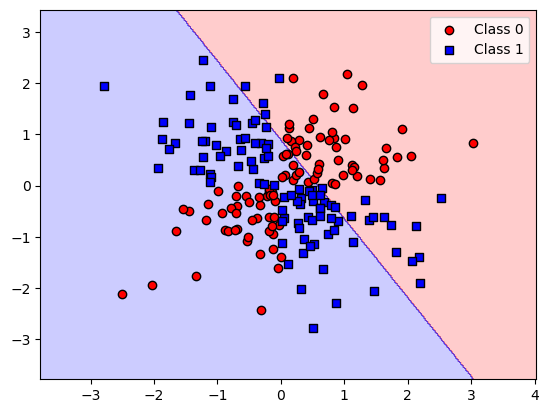

In [37]:
plot_decision_regions2(X_xor, y_xor, classifier=svm)

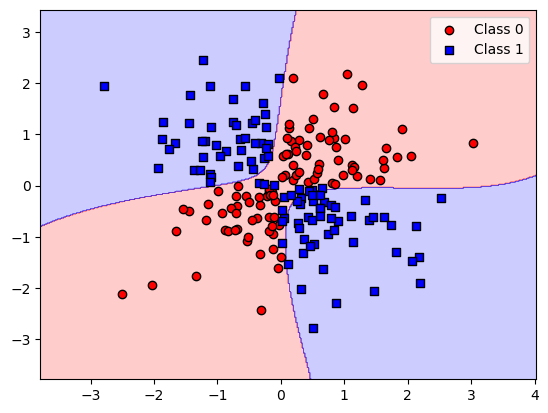

In [42]:
# SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=1, gamma=0.2, C=10)
svm_rbf.fit(X_xor, y_xor)
plot_decision_regions2(X_xor, y_xor, classifier=svm_rbf)

In [47]:
# SVM + RBF applied to Iris flower dataset
# Load and normalize data
# Load data from sklearn
iris = datasets.load_iris()
# Select features. iris data is a 4-column matrix. Here, the last two columns are selected.
X = iris.data[:, [2,3]]
# Get labels. iris.target is a 1D array.
y = iris.target

# Split the original data
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size = 0.3, random_state=1, stratify=y)

# Feature scaling
# Create an object of 'StandardScaler' class.
sc = StandardScaler()
# Get the mean and standard deviation of the training set.
sc.fit(X_train)
# Rescale the training set
X_train_std = sc.transform(X_train)
# Rescale the testing set
X_test_std = sc.transform(X_test)
# The rescaling formular is z = (x - u) / s

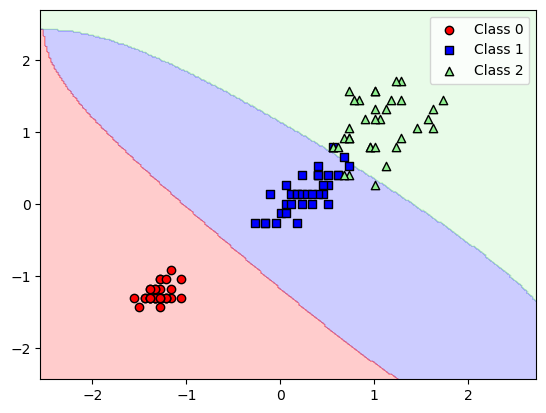

In [49]:
# SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=1, gamma=0.2, C=0.1)
svm_rbf.fit(X_train_std, y_train)
plot_decision_regions2(X_train_std, y_train, classifier=svm_rbf)

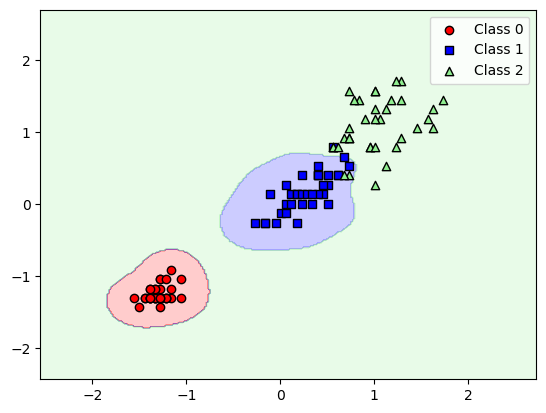

In [52]:
# Try different values of gamma
svm_rbf = SVC(kernel='rbf', random_state=1, gamma=10, C=1)
svm_rbf.fit(X_train_std, y_train)
plot_decision_regions2(X_train_std, y_train, classifier=svm_rbf)